<a id="analysis-section"></a>
## Stablecoin Transaction Analysis: Volume and Wallet Count

### Analysis Objective

The primary goal of this analysis is to estimate the monthly active users of stablecoins, serving as a proxy for the engagement in the Decentralized Finance (DeFi) space.


### Methodological Considerations:

- The wallet count is derived from `sender` addresses involved in Transfer events for USDT, USDC, or DAI.
- Each wallet is counted only once per month, regardless of the number of transactions it participates in.
- **Retail** wallets and volume metrics are transfers that involve assets valued between 1 and 10,000 units.
- **All** wallets & volume metrics are transfers to any address, whether it is another EOA, CEX or DEX
  - Deposits into a CEX involve two transactions:
    - Transaction 1: An address A sends an asset to the CEX address B. Here, address A is counted in **all** metrics
    - Transaction 2: The CEX address B typically moves the asset to a CEX-operated proxy address C. Address B is excluded from the **all** metrics to avoid double counting
- **KYC** wallets & volume metrics are transfers to an identified CEX Proxy address

- Retail, KYC and All metrics exclude transfers **from** CEX Proxy addresses

### Datasets

In [118]:
import pandas as pd

df_usdt, df_usdc, df_dai = [
    pd.read_csv(f"./data/{stable}.csv")
    for stable in ["df_usdt_unique", "df_usdc_unique", "df_dai_unique"]
]
df_usdt_kyc, df_usdc_kyc, df_dai_kyc = [
    pd.read_csv(f"./data/{stable}.csv")
    for stable in ["df_usdt_unique_kyc", "df_usdc_unique_kyc", "df_dai_unique_kyc"]
]
columns_to_display = [
    "date",
    "asset",
    "all_wallets",
    "all_vol",
    "retail_wallets",
    "retail_vol",
    "kyc_wallets",
    "kyc_vol",
    "kyc_retail_wallets",
    "kyc_retail_vol",
]
wallet_columns = ["all_wallets", "retail_wallets", "kyc_wallets", "kyc_retail_wallets"]
volume_columns = ["all_vol", "retail_vol", "kyc_vol", "kyc_retail_vol"]


def format_cols(df_original):
    df = df_original.copy()
    for col in wallet_columns:
        df[col] = df[col].apply(lambda x: f"{x:,}")
    for col in volume_columns:
        df[col] = df[col].apply(
            lambda x: f"{x / 1_000_000:,.1f}m"
            if x < 1_000_000_000
            else f"{x / 1_000_000_000:,.1f}b"
        )
    df = df[columns_to_display]
    return df

### USDT Transfer Analysis

In [125]:
df_usdt_merged = pd.merge(df_usdt, df_usdt_kyc, on=['date', 'asset'])
print(f'Average unique kyc wallets: {df_usdt_merged['kyc_wallets'].mean():,}')
df_usdt_formatted = format_cols(df_usdt_merged)
print(f'Overview:\n\n{df_usdt_formatted.to_string(index=False)}')

Average unique kyc wallets: 295,801.6
Overview:

   date asset all_wallets all_vol retail_wallets retail_vol kyc_wallets kyc_vol kyc_retail_wallets kyc_retail_vol
2023-01  USDT     657,176   82.0b        510,016       2.5b     291,549   19.0b            259,679         657.1m
2023-02  USDT     613,762   68.7b        478,746       2.7b     333,068   17.0b            304,207         660.9m
2023-03  USDT     742,190  133.0b        606,845       3.5b     342,013   32.6b            304,589         786.9m
2023-04  USDT     536,039   65.8b        495,010       2.8b     279,165   18.4b            247,663         676.0m
2023-05  USDT     530,336   65.9b        491,421       2.8b     258,278   17.6b            229,376         623.0m
2023-06  USDT     591,051   86.7b        525,139       2.4b     357,954   21.2b            324,656         659.3m
2023-07  USDT     538,635   66.5b        467,003       2.5b     238,470   15.3b            211,789         602.5m
2023-08  USDT     559,308   72.3b      

### USDC Transfer Analysis

In [126]:
df_usdc_merged = pd.merge(df_usdc, df_usdc_kyc, on=['date', 'asset'])
print(f'Average unique kyc wallets: {df_usdc_merged['kyc_wallets'].mean():,}')
df_usdc_formatted = format_cols(df_usdc_merged)
print(f'Unique total wallets and volume:\n\n{df_usdc_formatted.to_string(index=False)}')

Average unique kyc wallets: 97,664.9
Unique total wallets and volume:

   date asset all_wallets all_vol retail_wallets retail_vol kyc_wallets kyc_vol kyc_retail_wallets kyc_retail_vol
2023-01  USDC     317,236  407.2b        243,739       2.2b     117,772   45.9b            101,186         284.1m
2023-02  USDC     289,501  250.8b        237,186       2.7b      90,483   30.3b             74,358         254.0m
2023-03  USDC     368,841  339.7b        293,061       2.8b     120,601   44.5b             94,058         309.9m
2023-04  USDC     225,403  128.4b        203,314       1.7b      76,947   13.6b             63,103         199.2m
2023-05  USDC     198,372   89.7b        178,707       1.5b      91,485   13.6b             79,130         197.1m
2023-06  USDC     232,533  148.7b        202,879       1.3b     128,700   16.2b            114,303         209.2m
2023-07  USDC     230,367  116.1b        200,900       1.4b     117,754   15.8b            105,004         241.6m
2023-08  USDC    

### DAI Transfer Analysis

In [127]:
df_dai_merged = pd.merge(df_dai, df_dai_kyc, on=['date', 'asset'])
print(f'Average unique kyc wallets: {df_dai_merged['kyc_wallets'].mean():,}')
df_dai_formatted = format_cols(df_dai_merged)
print(f'Unique total wallets and volume:\n\n{df_dai_formatted.to_string(index=False)}')

Average unique kyc wallets: 9,714.6
Unique total wallets and volume:

   date asset all_wallets all_vol retail_wallets retail_vol kyc_wallets kyc_vol kyc_retail_wallets kyc_retail_vol
2023-01   DAI      42,869   19.8b         35,893     249.1m       8,366  286.7m              6,901          20.2m
2023-02   DAI      33,045   20.0b         27,909     265.1m      15,793  236.6m             14,564          21.0m
2023-03   DAI      49,071   57.1b         38,990     358.6m      13,017  801.0m             10,631          27.6m
2023-04   DAI      27,220   27.5b         23,306     182.0m       6,769  273.0m              5,652          16.2m
2023-05   DAI      31,337   23.3b         27,760     197.1m       5,999  150.4m              4,885          14.8m
2023-06   DAI      28,401   28.9b         23,912     175.8m      23,906  198.3m             22,780          17.3m
2023-07   DAI      24,907   53.3b         21,023     182.0m       6,169  162.8m              5,266          15.4m
2023-08   DAI     

## Stablecoin Usage Trends

This section visualizes the trends in stablecoin usage over time. The charts below break down the total number of wallets and the total volume of transactions for USDT, USDC, and DAI, providing insights into the adoption rates and transactional throughput of these stablecoins.


### Charts setup

In [122]:
# Define the charts
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter
%matplotlib inline
sns.set_theme(style="darkgrid")

# Concatenate and load the DataFrames
combined_df = pd.concat([df_usdt_merged, df_usdc_merged, df_dai_merged])

# If 'date' is of PeriodDtype, convert to Timestamp; else,  convert it to datetime
if isinstance(combined_df['date'].dtype, pd.PeriodDtype):
    combined_df['date'] = combined_df['date'].dt.to_timestamp()
elif not pd.api.types.is_datetime64_any_dtype(combined_df['date']):
    combined_df['date'] = pd.to_datetime(combined_df['date'])

def show_lineplot_wallets():
    # Plot the line graph
    sns.lineplot(data=combined_df, x='date', y='kyc_wallets', hue='asset')

    plt.title('KYC Wallets Over Time by Stablecoin')
    plt.xlabel('Period')
    plt.ylabel('KYC Wallets')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x * 1e-3:.0f}K')) # in thousands
    plt.xticks(rotation=45)  # Rotate the x-axis labels if needed
    plt.show()

def show_lineplot_volume():
    sns.lineplot(data=combined_df, x='date', y='kyc_vol', hue='asset')

    plt.title('KYC Volume Over Time by Stablecoin')
    plt.xlabel('Period')
    plt.ylabel('Total Volume')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1e9:.0f}b'))
    plt.xticks(rotation=45)  # Rotate the x-axis labels if needed
    plt.show()

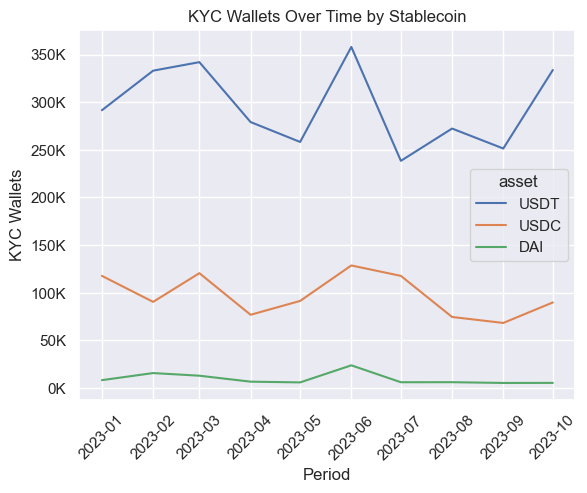

In [123]:
show_lineplot_wallets()

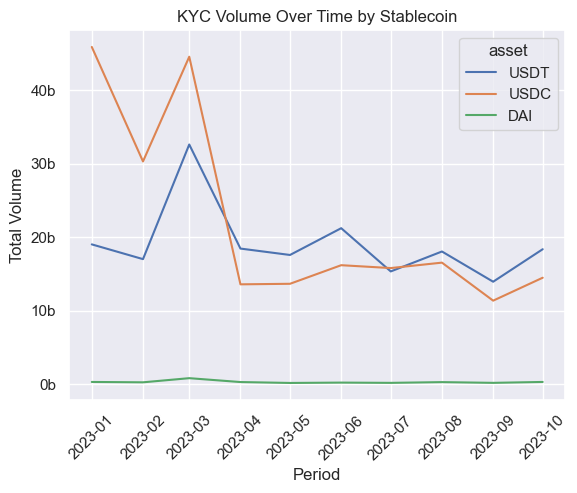

In [124]:
show_lineplot_volume()